 Classification model using Naive Bayes 
for salary data-NAIVE_BAYES MODEL

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn import metrics

In [2]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [3]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [4]:
train = pd.read_csv("SalaryData_Train.csv")

In [5]:
test=pd.read_csv("SalaryData_Test.csv")

EDA

In [6]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [8]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [12]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [14]:
train.shape

(30161, 14)

In [15]:
test.shape

(15060, 14)

In [16]:
train.isna()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30157,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30158,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30159,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [18]:
test.isna()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15056,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15057,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15058,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [20]:
train.duplicated().sum()

3258

In [21]:
test.duplicated().sum()

930

In [22]:
train1=train.drop_duplicates()

In [23]:
test1=test.drop_duplicates()

In [24]:
train1.duplicated().sum()

0

In [25]:
test1.duplicated().sum()

0

In [51]:
train1.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


In [52]:
test1.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.021979,0.076765,0.053172,0.088090
educationno,0.021979,1.000000,0.132346,0.085651,0.127779
capitalgain,0.076765,0.132346,1.000000,-0.033929,0.089512
capitalloss,0.053172,0.085651,-0.033929,1.000000,0.056353
hoursperweek,0.088090,0.127779,0.089512,0.056353,1.000000


Visualizing Data 

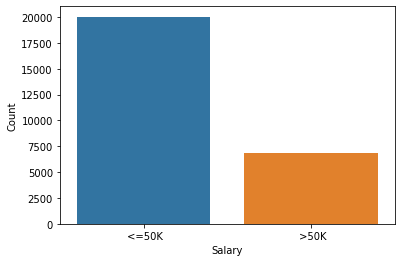

In [36]:
sns.countplot(x='Salary',data=train1)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [37]:
train1["Salary"].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

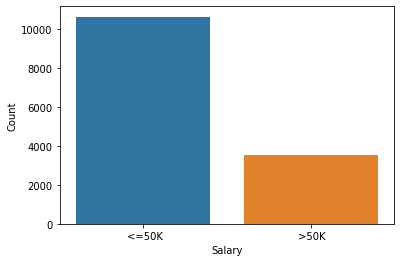

In [38]:
sns.countplot(x='Salary',data=test1)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [39]:
test1["Salary"].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

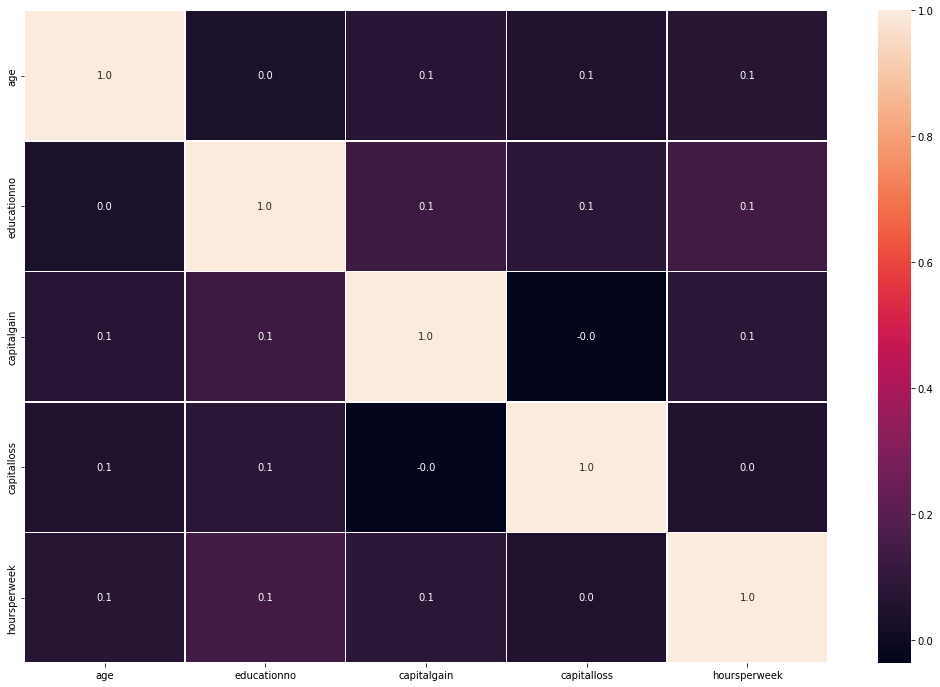

In [53]:
f,ax=plt.subplots(figsize=(18,12))
sns.heatmap(train1.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

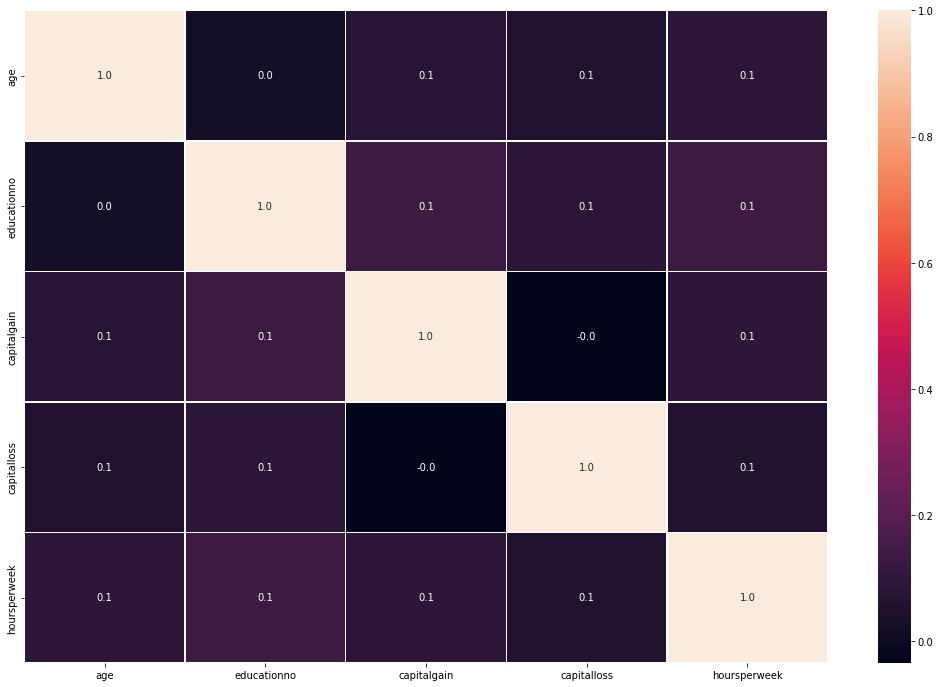

In [54]:
f,ax=plt.subplots(figsize=(18,12))
sns.heatmap(test1.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


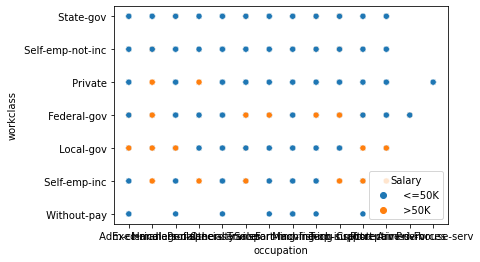

In [55]:
sns.scatterplot(train1['occupation'],train1['workclass'],hue=train1['Salary'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


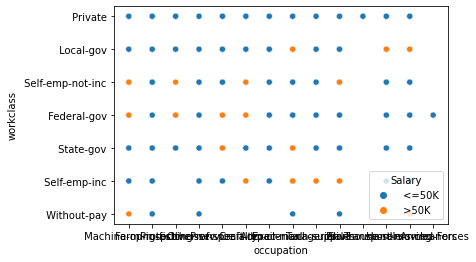

In [58]:
sns.scatterplot(test1['occupation'],test1['workclass'],hue=test1['Salary'])

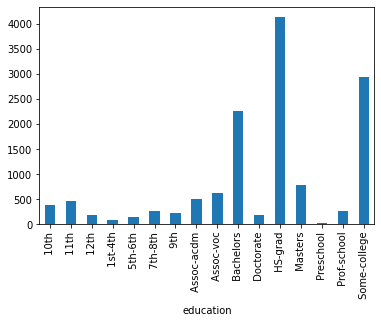

In [59]:
pd.crosstab(train1['Salary'],train1['education']).mean().plot(kind='bar')

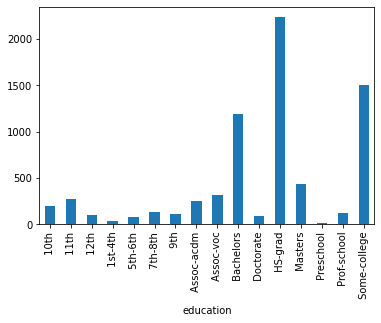

In [62]:
pd.crosstab(test1['Salary'],test1['education']).mean().plot(kind='bar')

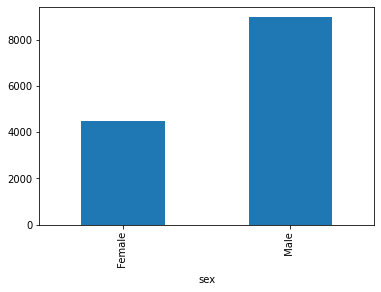

In [63]:
pd.crosstab(train1['Salary'],train1['sex']).mean().plot(kind='bar')

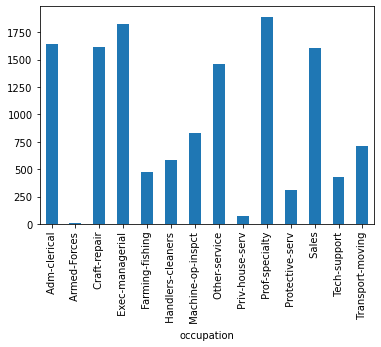

In [64]:
pd.crosstab(train1['Salary'],train1['occupation']).mean().plot(kind='bar')

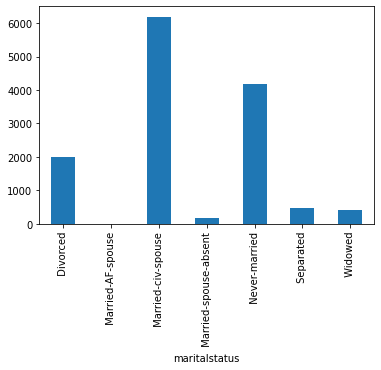

In [66]:
pd.crosstab(train1['Salary'],train1['maritalstatus']).mean().plot(kind='bar')

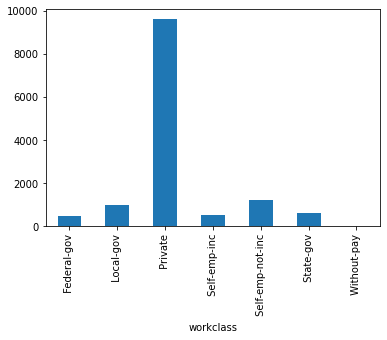

In [67]:
pd.crosstab(train1['Salary'],train1['workclass']).mean().plot(kind='bar')

Converting categorical to numerical

In [31]:
# Label Encoding
# converting categorical variables to numerical values in train data
naive_train=train1.apply(LabelEncoder().fit_transform)
naive_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [33]:
#Label Encoding
# converting categorical variables to numerical values in test data
naive_test=test1.apply(LabelEncoder().fit_transform)
naive_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


Model Building

In [68]:
#Splitting the training dataset into dependent(Salary) and independent variables:
X_train=naive_train[train1.columns[0:13]].values
Y_train=naive_train[train1.columns[13]].values

In [69]:
X_train

array([[22,  5,  9, ...,  0, 39, 37],
       [33,  4,  9, ...,  0, 12, 37],
       [21,  2, 11, ...,  0, 39, 37],
       ...,
       [10,  2,  7, ...,  0, 37, 37],
       [41,  2, 11, ...,  0, 39, 37],
       [35,  3, 11, ...,  0, 39, 37]])

In [70]:
Y_train

array([0, 0, 0, ..., 0, 0, 1])

In [71]:
#Splitting the testing dataset into dependent(Salary) and independent variables:
X_test=naive_test[test1.columns[0:13]].values
Y_test=naive_test[test1.columns[13]].values

In [72]:
X_test

array([[ 8,  2,  1, ...,  0, 39, 37],
       [21,  2, 11, ...,  0, 49, 37],
       [11,  1,  7, ...,  0, 39, 37],
       ...,
       [21,  2,  9, ...,  0, 49, 37],
       [27,  2,  9, ...,  0, 39, 37],
       [18,  3,  9, ...,  0, 59, 37]])

In [73]:
Y_test

array([0, 0, 1, ..., 0, 0, 1])

 NAIVE BAYES Model


Model Fitting

GAUSSIAN NAIVE BAYES

In [76]:
#model fitting
gnb=GB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [78]:
#Accuracy Score for train dataset
gnb.score(X_train,Y_train)

0.8082741701668958

In [79]:
#Model prediction for test dataset
y_pred=gnb.predict(X_test)

In [87]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [88]:
#accuracy score of test data
test_accuracy=np.mean(y_pred==Y_test)

In [89]:
test_accuracy

0.8142250530785563

In [90]:
#confusion matrix
CM=confusion_matrix(Y_test,y_pred)
CM

array([[9809,  811],
       [1814, 1696]])

Hence,by Gaussian Naive Bayes model the accuracy is 81.42%

MULTINOMIAL Naive Bayes

In [97]:
#accuracy of train dataset
classifier_mb=MB()
classifier_mb.fit(X_train,Y_train)
classifier_mb.score(X_train,Y_train)
classifier_mb.score(X_test,Y_test)
predicted_result=classifier_mb.predict(X_train)
accuracy_train=np.mean(predicted_result==Y_train)


In [98]:
accuracy_train

0.7753038694569379

In [99]:
#accuracy score of test data
test_predict=classifier_mb.predict(X_test)
test_accuracy_1=np.mean(test_predict==Y_test)

In [100]:
test_accuracy_1

0.7789808917197453

Hence,by Multinomial Naive Bayes model the accuracy score is 77.89%.

In [103]:
table={'model':['GaussianNB',"MultinomialNB"],'accuracy':[test_accuracy,test_accuracy_1]}
table=pd.DataFrame(table)

In [104]:
table

,model,accuracy
0,GaussianNB,0.814225
1,MultinomialNB,0.778981


In Naive Bayes model,we use both Gaussian and Multinomial naive bayes for checking the best classifier.Therefore by above table we can conclude that GaussianNB has more accuracy score(81.42%) than accuracy score of MultinomialNB i.e.,77.89%.So,Gaussian Naive Bayes having higher accuracy score of 81.42% is used for classification model and Gaussian Naive Bayes is the best classifier used
for salary data for classification.